In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
#from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer
data = pd.read_csv('../data/LBNL_file.csv', low_memory=False)

df = data.replace([-9999, '-9999', -9999.0], np.nan)
pd.options.display.max_columns = None


In [166]:


#sns.boxplot(x='total_installed_price', data=df)

#sns.boxplot(x="system_size_DC", data=df)





In [167]:
df = df[df["customer_segment"] == "RES"]
df= df[df['total_installed_price'].notna()]
df= df[df['system_size_DC'].notna()]

df = df[df["total_installed_price"] > 100]

df = df.sort_values(by = 'total_installed_price', ascending=True)


print(df.shape)
df.head(100)
#df.info()


(785715, 78)


,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,zip_code,city,state,utility_service_territory,third_party_owned,installer_name,self_installed,azimuth_1,azimuth_2,azimuth_3,tilt_1,tilt_2,tilt_3,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,technology_module_3,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,solar_storage_hybrid_inverter_3,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
494693,CA_CPUC,NaN,SDGE-INT-93156,NaN,18-Dec-2015 00:00:00,25.62,103.00,0.0,RES,0.0,0.0,NaN,0.0,1.0,92067,RANCHO SANTA FE,CA,San Diego Gas and Electric,0.0,Milholland Electric,0.0,NaN,NaN,NaN,NaN,NaN,NaN,LG Electronics Inc.,LG305A1C-B3,84.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,305.0,NaN,NaN,0.192114,NaN,NaN,LG ELECTRONICS INC.,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
381509,CA_CPUC,NaN,PGE-INT-113598808,NaN,17-Jul-2017 00:00:00,40.20,127.64,0.0,RES,0.0,0.0,NaN,0.0,0.0,95746,GRANITE BAY,CA,Pacific Gas and Electric,0.0,Sunworks United,0.0,165.0,NaN,NaN,26.0,NaN,NaN,SunPower,SPR-X21-335,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,335.0,NaN,NaN,0.205431,NaN,NaN,SolarEdge Technologies Ltd.,SE11400A-US [240V],3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,11.39,NaN,NaN,1.0,1.176471,NaN,NaN
467997,CA_CPUC,NaN,SDGE-INT-158407,NaN,22-Mar-2018 00:00:00,7.25,132.00,0.0,RES,0.0,0.0,NaN,0.0,0.0,92071,SANTEE,CA,San Diego Gas and Electric,1.0,Bright Planet Solar,0.0,125.0,NaN,NaN,17.0,NaN,NaN,REC Solar,REC290TP BLK,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Multi-c-Si,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,290.0,NaN,NaN,0.175756,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
347071,CA_CPUC,NaN,SDGE-INT-157214,NaN,29-Jan-2018 00:00:00,4.50,132.00,0.0,RES,0.0,0.0,NaN,0.0,0.0,92672,SAN CLEMENTE,CA,San Diego Gas and Electric,1.0,Bright Planet Solar,0.0,136.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOLAREDGE TECHNOLOGIES LTD.,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
344771,CA_CPUC,NaN,SDGE-INT-152275,NaN,14-Dec-2017 00:00:00,6.30,132.00,0.0,RES,0.0,1.0,NaN,0.0,0.0,92084,VISTA,CA,San Diego Gas and Electric,1.0,Bright Planet Solar,0.0,187.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOLAREDGE TECHNOLOGIES LTD.,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952516,

Alaraja = 16481.0 Yläraja = 33647.25 IQR = 17166.25
(757105, 78)


<AxesSubplot:xlabel='total_installed_price'>

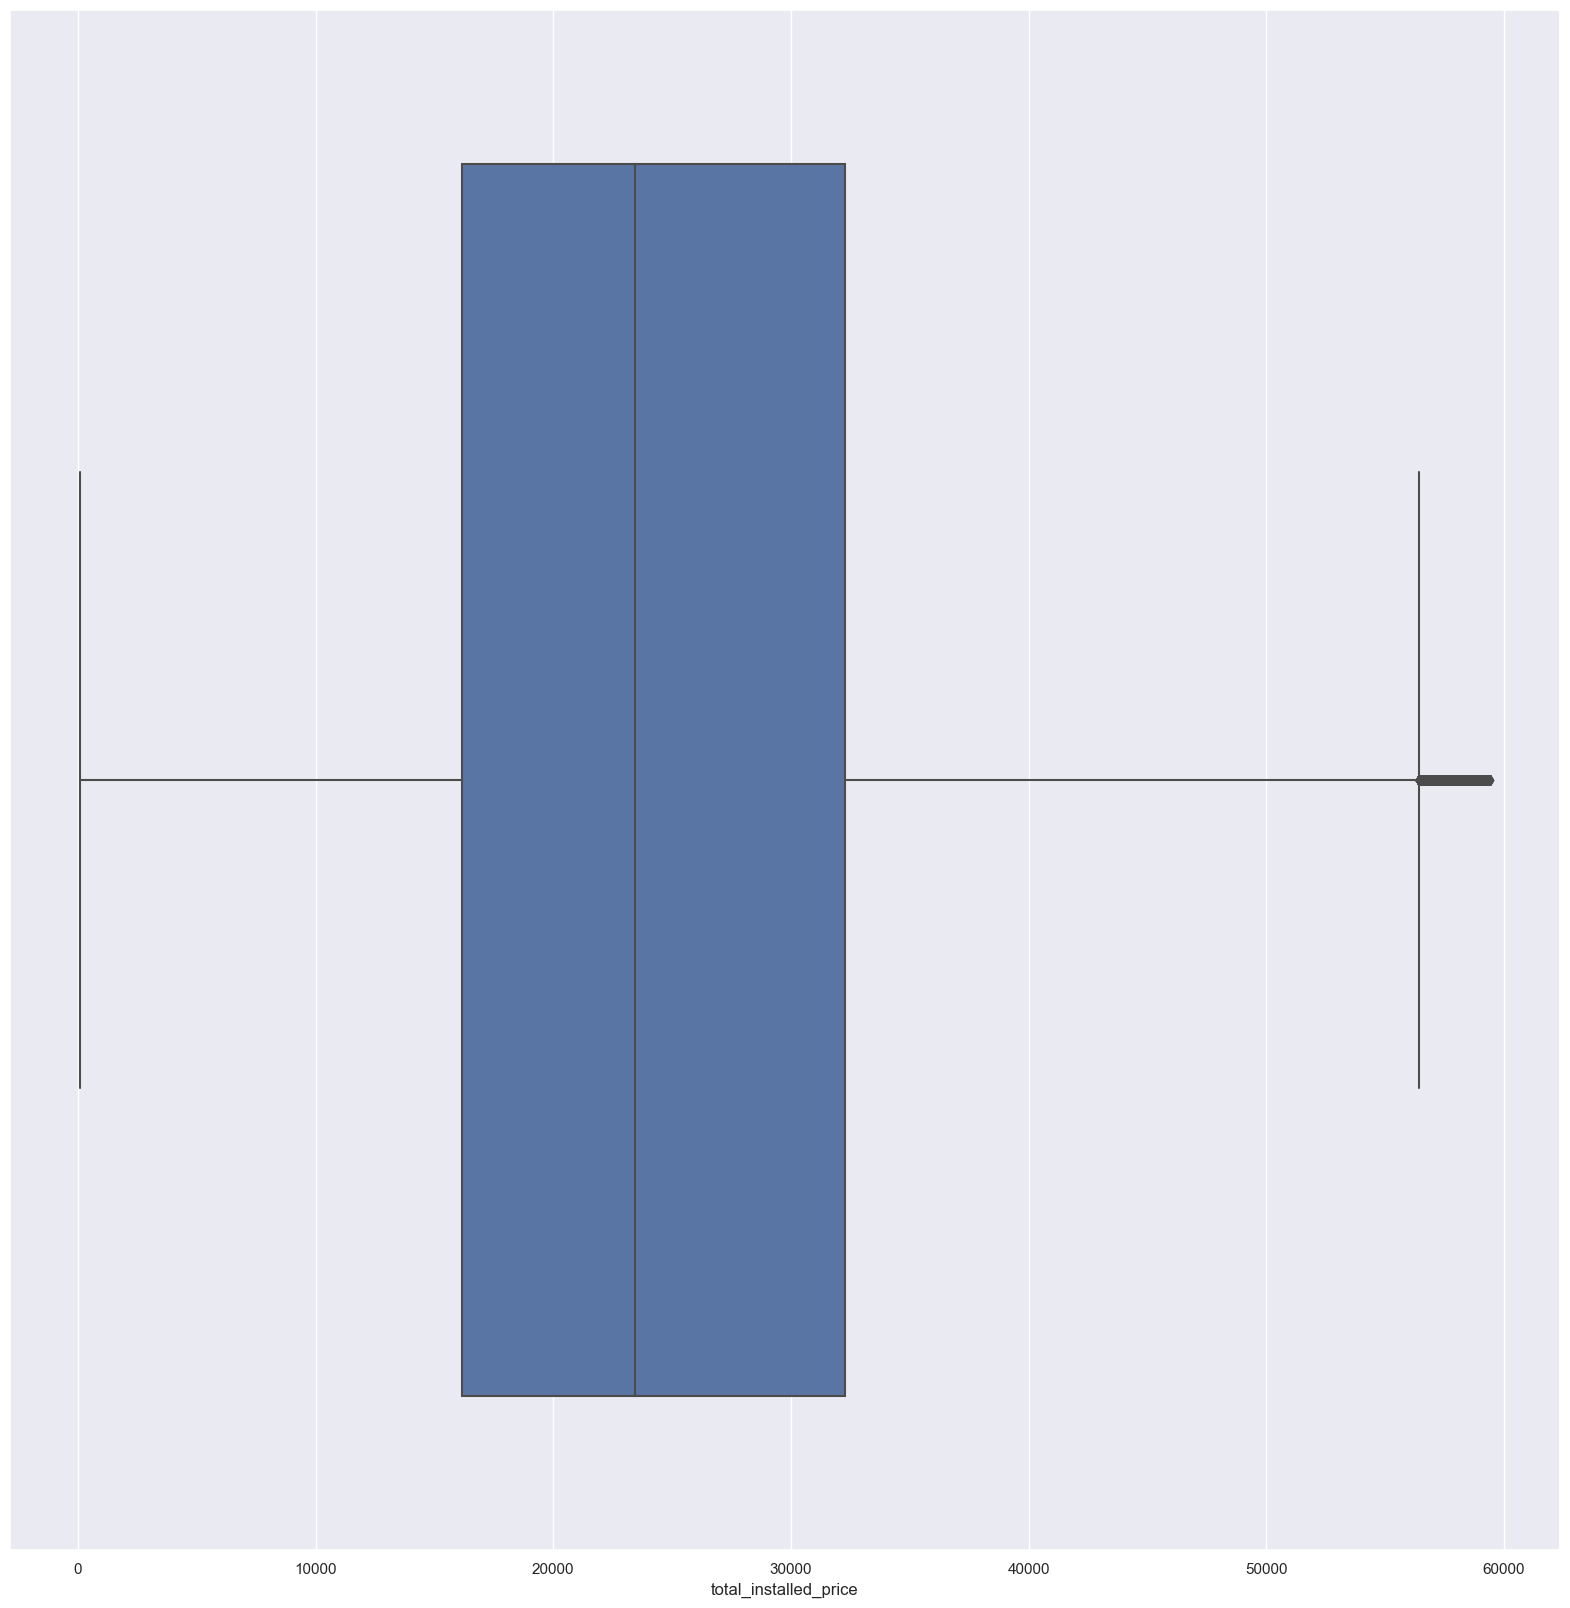

In [168]:
alaraja, ylaraja = np.percentile(a=df["total_installed_price"], q=[25,75])
iqr = ylaraja - alaraja
print((f"Alaraja = {alaraja} Yläraja = {ylaraja} IQR = {iqr}"))

# Tehdään uudet yla- ja alarajat missä mukana 1.5*IQR

alaraja_iqr = alaraja - 1.5*iqr
ylaraja_iqr = ylaraja + 1.5*iqr

df = df[(df["total_installed_price"] > alaraja_iqr) & (df["total_installed_price"] < ylaraja_iqr)]


print(df.shape)
sns.boxplot(x="total_installed_price", data=df)

Alaraja = 3.85 Yläraja = 7.3 IQR = 3.4499999999999997
(741176, 78)


<AxesSubplot:xlabel='system_size_DC'>

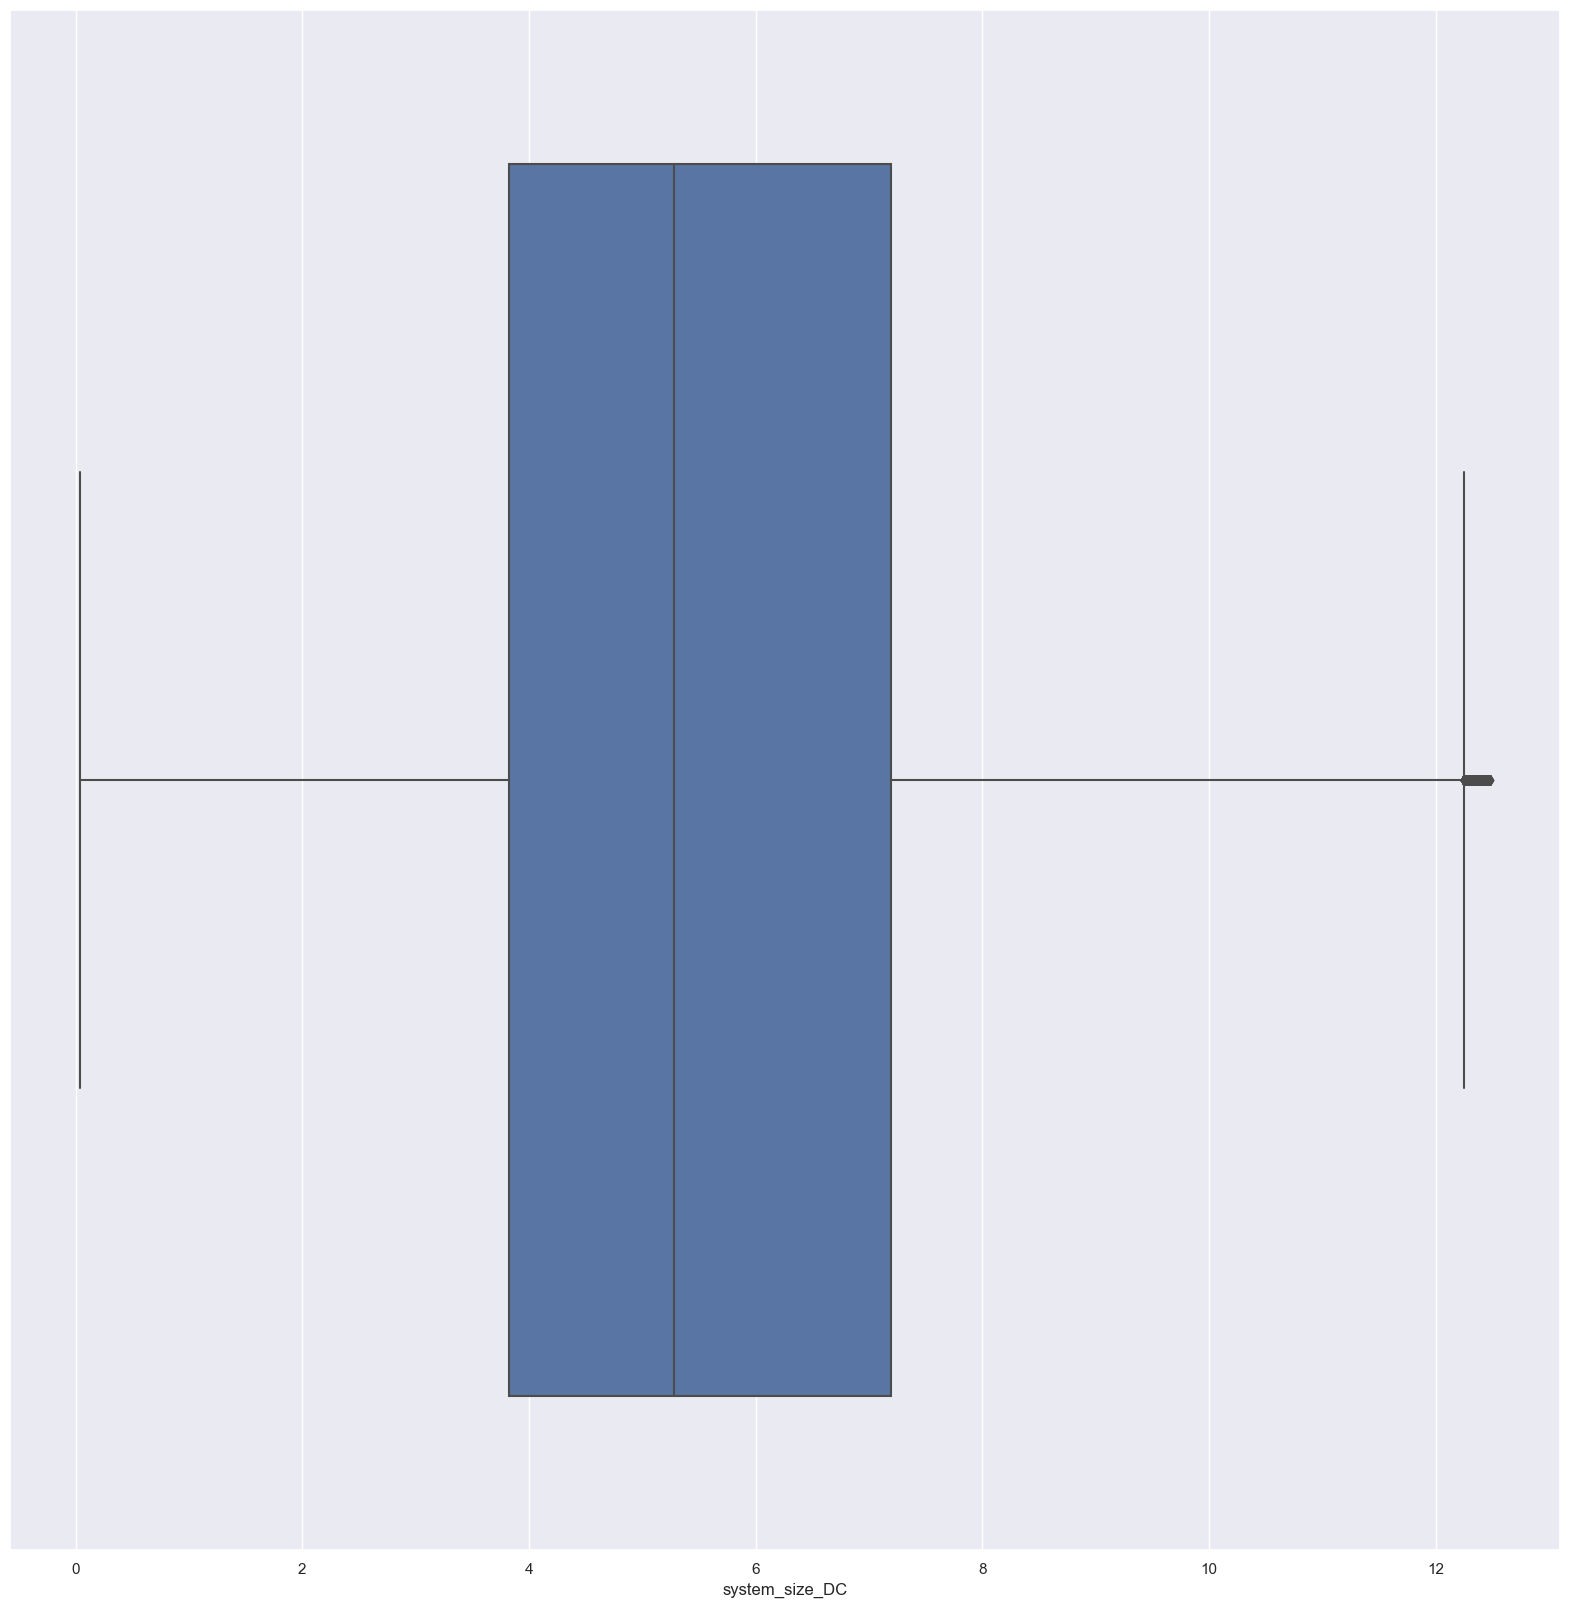

In [169]:
alaraja, ylaraja = np.percentile(a=df["system_size_DC"], q=[25,75])
iqr = ylaraja - alaraja
print((f"Alaraja = {alaraja} Yläraja = {ylaraja} IQR = {iqr}"))

# Tehdään uudet yla- ja alarajat missä mukana 1.5*IQR

alaraja_iqr = alaraja - 1.5*iqr
ylaraja_iqr = ylaraja + 1.5*iqr

df = df[(df["system_size_DC"] > alaraja_iqr) & (df["system_size_DC"] < ylaraja_iqr)]


print(df.shape)
sns.boxplot(x="system_size_DC", data=df)

In [180]:
df.head(10)

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,zip_code,city,state,utility_service_territory,third_party_owned,installer_name,self_installed,azimuth_1,azimuth_2,azimuth_3,tilt_1,tilt_2,tilt_3,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,technology_module_3,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,solar_storage_hybrid_inverter_3,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
467997,CA_CPUC,NaN,SDGE-INT-158407,NaN,22-Mar-2018 00:00:00,7.25,132.0,0.0,RES,0.0,0.0,NaN,0.0,0.0,92071,SANTEE,CA,San Diego Gas and Electric,1.0,Bright Planet Solar,0.0,125.0,NaN,NaN,17.00,NaN,NaN,REC Solar,REC290TP BLK,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Multi-c-Si,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,290.0,NaN,NaN,0.175756,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
347071,CA_CPUC,NaN,SDGE-INT-157214,NaN,29-Jan-2018 00:00:00,4.50,132.0,0.0,RES,0.0,0.0,NaN,0.0,0.0,92672,SAN CLEMENTE,CA,San Diego Gas and Electric,1.0,Bright Planet Solar,0.0,136.0,NaN,NaN,18.00,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOLAREDGE TECHNOLOGIES LTD.,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
344771,CA_CPUC,NaN,SDGE-INT-152275,NaN,14-Dec-2017 00:00:00,6.30,132.0,0.0,RES,0.0,1.0,NaN,0.0,0.0,92084,VISTA,CA,San Diego Gas and Electric,1.0,Bright Planet Solar,0.0,187.0,NaN,NaN,19.00,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOLAREDGE TECHNOLOGIES LTD.,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
396945,CA_CPUC,NaN,SDGE-INT-148966,NaN,10-Nov-2017 00:00:00,5.40,132.0,0.0,RES,0.0,1.0,NaN,1.0,0.0,92057,OCEANSIDE,CA,San Diego Gas and Electric,1.0,Bright Planet Solar,0.0,0.0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
504663,CA_CPUC,NaN,SDGE-INT-152216,NaN,09-Feb-2018 00:00:00,5.70,132.0,0.0,RES,0.0,0.0,NaN,0.0,0.0,92111,SAN DIEGO,CA,San Diego Gas and Electric,1.0,Bright Planet Solar,0.0,173.0,NaN,NaN,0.01,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SolarEdge Technologies,SE5000H-US (240V),1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,5.00,NaN,NaN,1.0,1.140000,NaN,NaN
465635,CA_CPUC,NaN,SCE-INT-NST-26083,NaN,23-Feb-2018 00:00:00,3.99,132.0,0.0,RES,0.0,0.0,NaN,0.0,0.0,93555,RIDGECREST,CA,Southern California Edison,1.0,Bright Planet Solar,0.0,180.0,NaN,NaN,18.00,NaN,NaN,REC Solar,REC285TP2,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Multi-c-Si,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,285.0,NaN,NaN,0.170153,NaN,NaN,SOLAREDGE TECHNOLOGIES,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0

In [171]:
df.columns

Index(['data_provider_1', 'data_provider_2', 'system_ID_1', 'system_ID_2',
       'installation_date', 'system_size_DC', 'total_installed_price',
       'rebate_or_grant', 'customer_segment', 'expansion_system',
       'multiple_phase_system', 'new_construction', 'tracking',
       'ground_mounted', 'zip_code', 'city', 'state',
       'utility_service_territory', 'third_party_owned', 'installer_name',
       'self_installed', 'azimuth_1', 'azimuth_2', 'azimuth_3', 'tilt_1',
       'tilt_2', 'tilt_3', 'module_manufacturer_1', 'module_model_1',
       'module_quantity_1', 'module_manufacturer_2', 'module_model_2',
       'module_quantity_2', 'module_manufacturer_3', 'module_model_3',
       'module_quantity_3', 'additional_modules', 'technology_module_1',
       'technology_module_2', 'technology_module_3', 'BIPV_module_1',
       'BIPV_module_2', 'BIPV_module_3', 'bifacial_module_1',
       'bifacial_module_2', 'bifacial_module_3', 'nameplate_capacity_module_1',
       'nameplate_capaci

In [172]:
import seaborn as sns


d = df.copy()



# vain california
d = d[d['state'] == "CA"]



In [173]:
# Inverterin koko laskettuna inverter loading ration perusteella
d['inverter_total_capacity'] = d['system_size_DC'] /  d['inverter_loading_ratio']


# paneelien yhteenlaskettu määrä
d['module_quantity'] = d[['module_quantity_1','module_quantity_2','module_quantity_3']].sum(axis=1)

# paneelien hyötysuhteen keskiarvo
d['module_efficiency'] = d[['efficiency_module_1', 'efficiency_module_2',
       'efficiency_module_3']].mean(axis=1)


# Jos systeemissä on mikro-inverttereitä
d['micro_inverter'] = d[['micro_inverter_1', 'micro_inverter_2','micro_inverter_3']].sum(axis=1)
d.loc[d['micro_inverter'] > 0, 'micro_inverter'] = 1
d.loc[d[['micro_inverter_1', 'micro_inverter_2', 'micro_inverter_3']].isnull().all(axis=1),'micro_inverter']=np.nan


# Jos systeemissä on solar_storage_hybrid_inverter
d['solar_storage_hybrid_inverter'] = d[['solar_storage_hybrid_inverter_1','solar_storage_hybrid_inverter_2', 'solar_storage_hybrid_inverter_3',]].sum(axis=1)
d.loc[d['solar_storage_hybrid_inverter'] > 0, 'solar_storage_hybrid_inverter'] = 1
# jos kaikki kolme saraketta nan
d.loc[d[['solar_storage_hybrid_inverter_1','solar_storage_hybrid_inverter_2', 'solar_storage_hybrid_inverter_3']].isnull().all(1),'solar_storage_hybrid_inverter']=np.nan


# Jos systeemissä on built_in_meter_inverter
d['built_in_meter_inverter'] = d[['built_in_meter_inverter_1', 'built_in_meter_inverter_2','built_in_meter_inverter_3']].sum(axis=1)
d.loc[d['built_in_meter_inverter'] > 0, 'built_in_meter_inverter'] = 1
# jos kaikki kolme saraketta nan
d.loc[d[['built_in_meter_inverter_1', 'built_in_meter_inverter_2', 'built_in_meter_inverter_3']].isnull().all(axis=1),'built_in_meter_inverter']=np.nan


# Jos systeemissä on 'BIPV_module',
d['BIPV_module'] = d[['BIPV_module_1', 'BIPV_module_2', 'BIPV_module_3']].sum(axis=1)
d.loc[d['BIPV_module'] > 0, 'BIPV_module'] = 1
# jos kaikki kolme saraketta nan
d.loc[d[['BIPV_module_1','BIPV_module_2', 'BIPV_module_3']].isnull().all(axis=1),'BIPV_module']=np.nan

# Jos systeemissä on 'bifacial_module',
d['bifacial_module'] = d[['bifacial_module_1', 'bifacial_module_2', 'bifacial_module_3']].sum(axis=1)
d.loc[d['bifacial_module'] > 0, 'bifacial_module'] = 1
# jos kaikki kolme saraketta nan
d.loc[d[['bifacial_module_1','bifacial_module_2', 'bifacial_module_3']].isnull().all(axis=1),'bifacial_module']=np.nan
  
    
# nimellistehojen keskiarvo
d['nameplate_capacity'] = d[['nameplate_capacity_module_1',
       'nameplate_capacity_module_2', 'nameplate_capacity_module_3']].mean(axis=1)


# Invertterien määrä yhteensä
d['inverter_quantity'] = d[['inverter_quantity_1', 'inverter_quantity_2','inverter_quantity_3']].sum(axis=1)
# jos kaikki kolme saraketta nan
d.loc[d[['inverter_quantity_1', 'inverter_quantity_2','inverter_quantity_3']].isnull().all(axis=1),'inverter_quantity']=np.nan


# tilt-keskiarvo
d['tilt'] = d[['tilt_1','tilt_2', 'tilt_3']].mean(axis=1)

# suuntaus
d['azimuth'] = d['azimuth_1']

# residentail = 1, non-residental = 0
d['residential'] = np.where(d['customer_segment'] == "RES", 1, 0)



In [174]:
d.drop(columns=['data_provider_1', 'data_provider_2', 'system_ID_1', 'system_ID_2','module_manufacturer_1', 'module_model_1',
       'module_quantity_1', 'module_manufacturer_2', 'module_model_2',
       'module_quantity_2', 'module_manufacturer_3', 'module_model_3',
       'module_quantity_3', 'additional_modules','azimuth_1', 'azimuth_2', 'azimuth_3', 'tilt_1',
       'tilt_2', 'tilt_3','BIPV_module_1',
       'BIPV_module_2', 'BIPV_module_3', 'BIPV_module','bifacial_module_1',
       'bifacial_module_2', 'bifacial_module_3', 'bifacial_module','inverter_manufacturer_1', 'inverter_model_1',
       'inverter_quantity_1', 'inverter_manufacturer_2', 'inverter_model_2',
       'inverter_quantity_2', 'inverter_manufacturer_3', 'inverter_model_3',
       'inverter_quantity_3', 'additional_inverters', 'micro_inverter_1',
       'micro_inverter_2','micro_inverter_2','micro_inverter_3', 'efficiency_module_1', 'efficiency_module_2',
       'efficiency_module_3',
        'solar_storage_hybrid_inverter_1','solar_storage_hybrid_inverter_2', 'solar_storage_hybrid_inverter_3', 'built_in_meter_inverter_1', 'built_in_meter_inverter_2',
       'built_in_meter_inverter_3','output_capacity_inverter_1',
       'output_capacity_inverter_2', 'output_capacity_inverter_3', 'nameplate_capacity_module_1',
       'nameplate_capacity_module_2', 'nameplate_capacity_module_3'], inplace=True)





In [175]:
# kaikki nan
d.drop(columns=['technology_module_3'], inplace=True)

In [176]:
d.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 740342 entries, 467997 to 630851
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   installation_date              740342 non-null  object 
 1   system_size_DC                 740342 non-null  float64
 2   total_installed_price          740342 non-null  float64
 3   rebate_or_grant                737069 non-null  float64
 4   customer_segment               740342 non-null  object 
 5   expansion_system               740342 non-null  float64
 6   multiple_phase_system          740342 non-null  float64
 7   new_construction               189281 non-null  float64
 8   tracking                       716933 non-null  float64
 9   ground_mounted                 648265 non-null  float64
 10  zip_code                       740342 non-null  object 
 11  city                           740342 non-null  object 
 12  state                    

<AxesSubplot:>

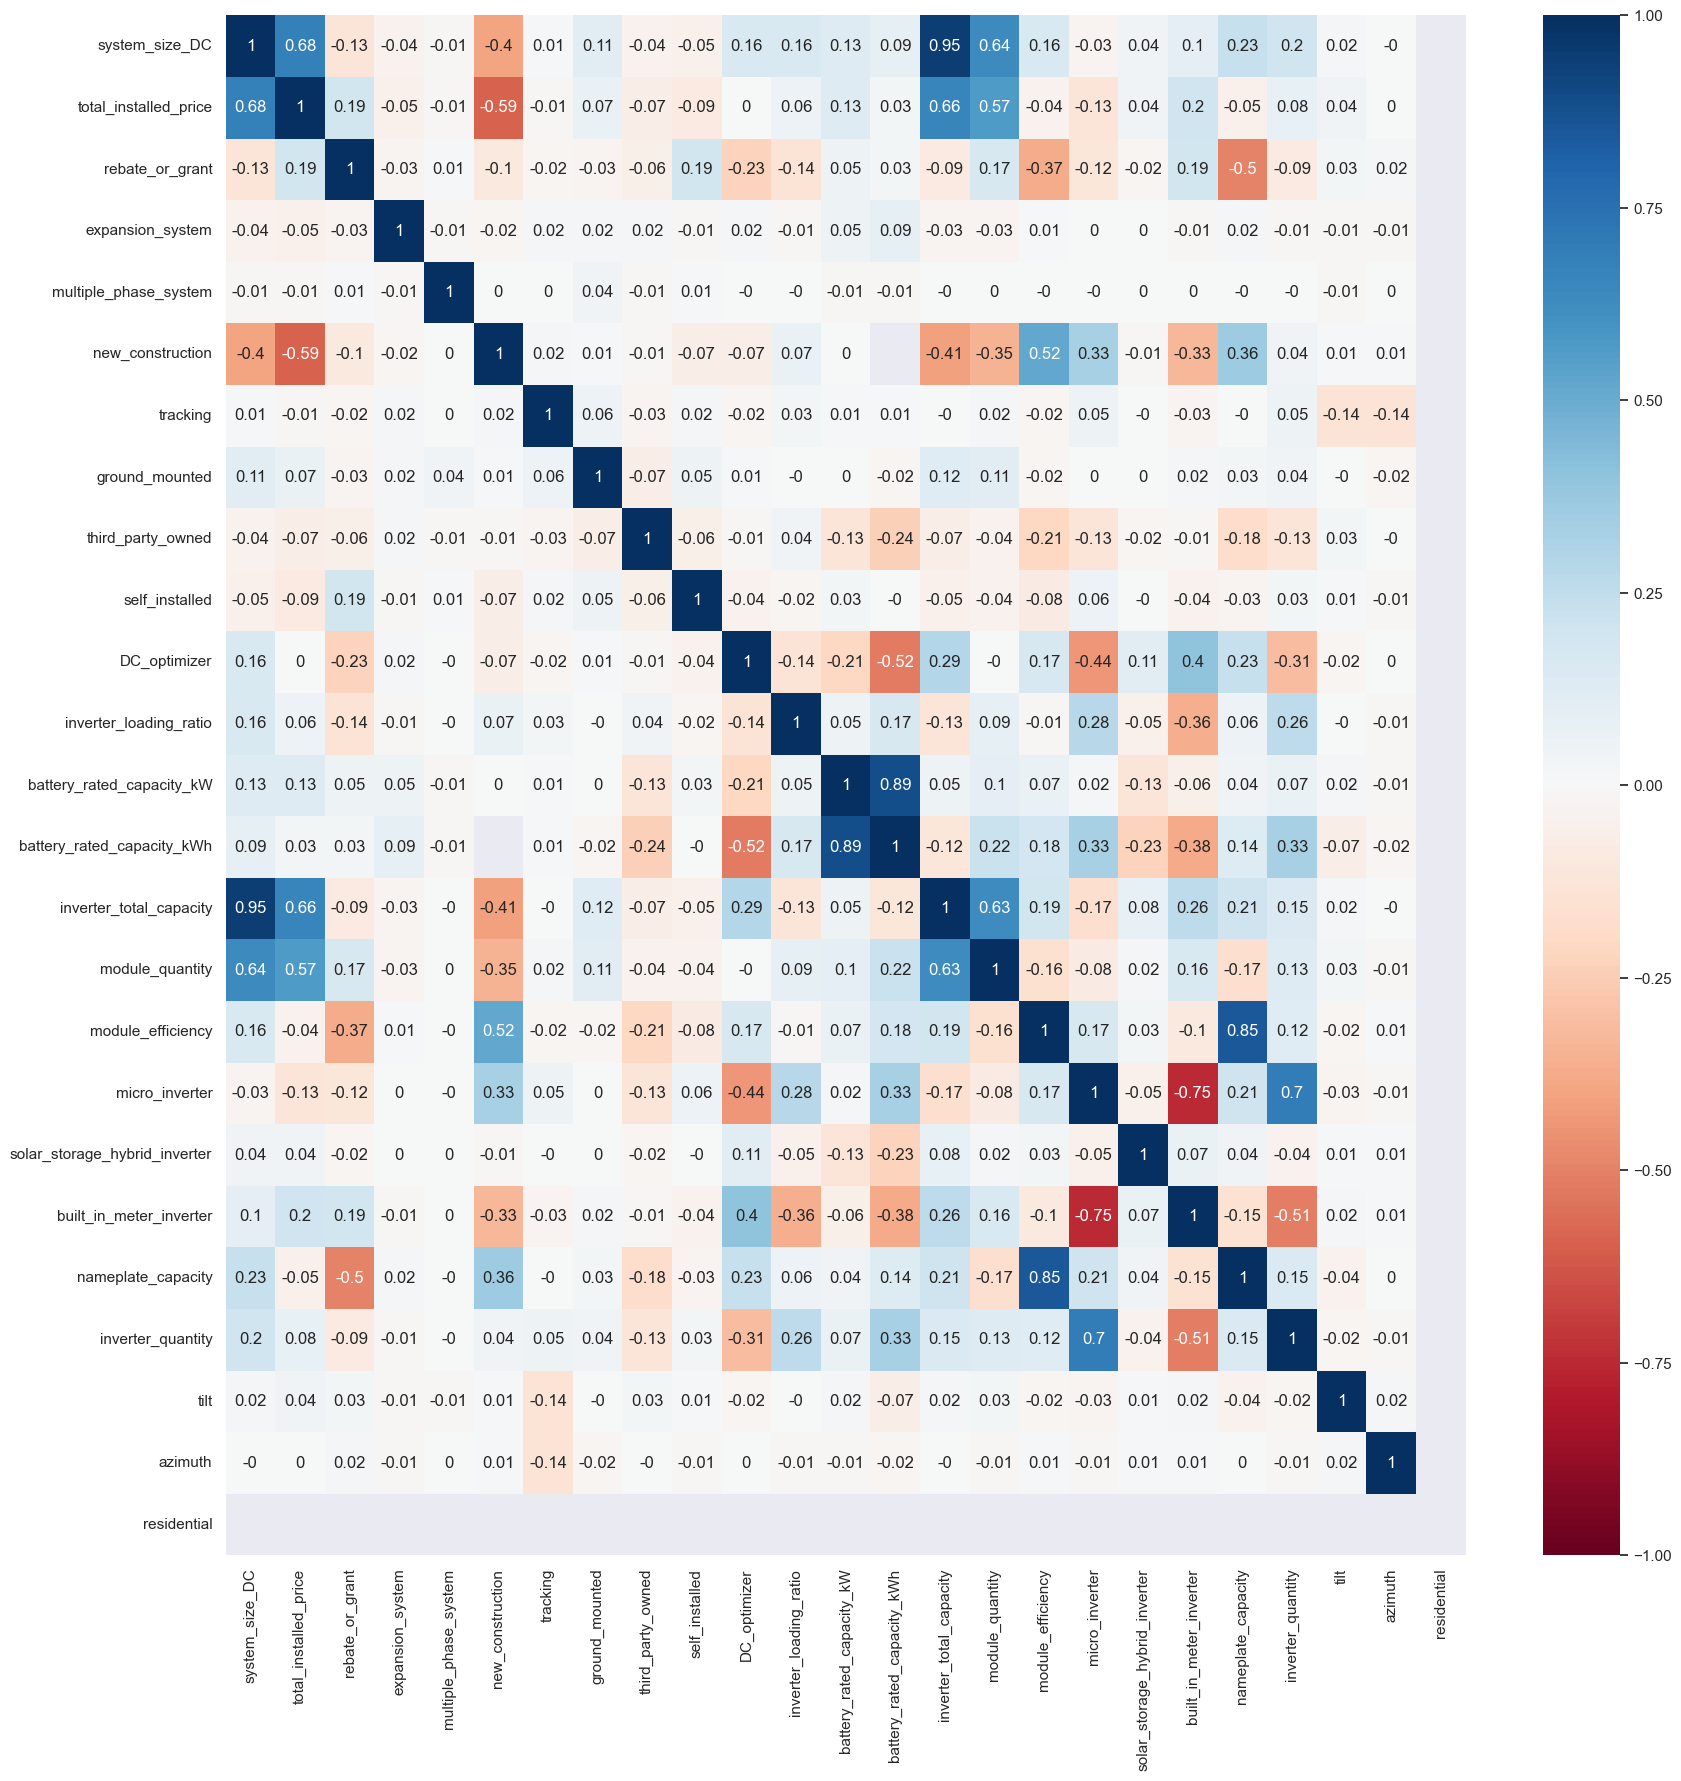

In [177]:
sns.set(rc={'figure.figsize':(20,20)})
corr = d.corr()
corr = corr.round(2)
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [178]:
df2 = d.copy()


res = df2[df2['residential'] == 1].copy()
non_res = df2[df2['residential'] == 0].copy()

res_price_per_kw = res['total_installed_price'] / res['system_size_DC']
res_avg_price_per_kw = res_price_per_kw.mean()
res['total_installed_price'].fillna(round(res_avg_price_per_kw * res['system_size_DC'], 2) , inplace=True)

non_res_price_per_kw = non_res['total_installed_price'] / non_res['system_size_DC']
non_res_avg_price_per_kw = non_res_price_per_kw.mean()
non_res['total_installed_price'].fillna(round(non_res_avg_price_per_kw * non_res['system_size_DC'], 2) , inplace=True)



non_res.info()

res.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   installation_date              0 non-null      object 
 1   system_size_DC                 0 non-null      float64
 2   total_installed_price          0 non-null      float64
 3   rebate_or_grant                0 non-null      float64
 4   customer_segment               0 non-null      object 
 5   expansion_system               0 non-null      float64
 6   multiple_phase_system          0 non-null      float64
 7   new_construction               0 non-null      float64
 8   tracking                       0 non-null      float64
 9   ground_mounted                 0 non-null      float64
 10  zip_code                       0 non-null      object 
 11  city                           0 non-null      object 
 12  state                          0 non-null      object 
 13  ut

In [179]:
non_res

ax = sns.barplot(x="total_installed_price",y="customer_segment",data=non_res)

ValueError: min() arg is an empty sequence

In [ ]:
#sns.boxplot(data=non_res)

res = res.sort_values(by = 'system_size_DC', ascending=False)

res.head(10)

,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,zip_code,city,state,utility_service_territory,third_party_owned,installer_name,self_installed,technology_module_1,technology_module_2,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,inverter_total_capacity,module_quantity,module_efficiency,micro_inverter,solar_storage_hybrid_inverter,built_in_meter_inverter,nameplate_capacity,inverter_quantity,tilt,azimuth,residential
470066,31-Aug-2018 00:00:00,1106.5600,2280000.00,0.0,RES,1,0,NaN,0.0,1.0,92027,ESCONDIDO,CA,San Diego Gas and Electric,0.0,NaN,1.0,Multi-c-Si,NaN,0.0,1.055072,NaN,NaN,1048.800,4256.0,0.167874,0.0,NaN,1.0,260.0,38.0,15.0,180.0,1
557598,10-Jun-2014 00:00:00,1100.7180,5037943.12,0.0,RES,0,0,NaN,0.0,0.0,92241,DESERT HOT SPRINGS,CA,Southern California Edison,0.0,Shorebreak Energy Developers,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,1.0,NaN,42.0,NaN,NaN,1
128171,26-Nov-2019 00:00:00,1097.5550,2976760.00,0.0,RES,0,0,NaN,1.0,1.0,92058,OCEANSIDE,CA,San Diego Gas and Electric,0.0,Shorebreak Energy Developers,0.0,Mono,NaN,0.0,1.155564,NaN,NaN,949.800,3007.0,0.188144,0.0,0.0,0.0,365.0,20.0,0.0,0.0,1
954783,04-May-2017 00:00:00,878.3772,3129000.00,0.0,RES,0,0,NaN,0.0,1.0,91745,HACIENDA HEIGHTS,CA,Southern California Edison,0.0,Shorebreak Energy Developers,0.0,Mono,NaN,0.0,NaN,NaN,NaN,NaN,1920.0,0.173367,0.0,0.0,0.0,345.0,18.0,10.0,206.0,1
560391,24-Jun-2019 00:00:00,775.2000,916861.70,0.0,RES,0,0,NaN,0.0,1.0,93030,OXNARD,CA,Southern California Edison,1.0,Tesla Energy,0.0,NaN,Multi-c-Si,0.0,1.174545,250.0,500.0,660.000,2281.0,NaN,0.0,NaN,0.0,NaN,20.0,5.0,270.0,1
478543,21-May-2018 00:00:00,774.7865,2811370.00,0.0,RES,0,0,NaN,0.0,1.0,92648,HUNTINGTON BEACH,CA,Southern California Edison,0.0,Shorebreak Energy Developers,0.0,Mono,NaN,0.0,NaN,NaN,NaN,NaN,678.0,0.186170,0.0,0.0,NaN,350.0,4.0,5.0,270.0,1
846932,08-Dec-2016 00:00:00,721.3950,2092045.00,0.0,RES,0,0,NaN,0.0,0.0,92028,FALLBROOK,CA,San Diego Gas and Electric,1.0,Shorebreak Energy Developers,0.0,Mono,NaN,0.0,NaN,NaN,NaN,NaN,2091.0,0.173367,0.0,0.0,0.0,345.0,11.0,10.0,180.0,1
664401,31-May-2017 00:00:00,718.7200,3065561.00,0.0,RES,0,0,NaN,1.0,0.0,92543,HEMET,CA,Southern California Edison,0.0,Shorebreak Energy Developers,0.0,Mono,NaN,0.0,1.151795,NaN,NaN,624.000,2246.0,NaN,0.0,0.0,0.0,NaN,26.0,NaN,NaN,1
572503,18-Jan-2017 00:00:00,680.1600,2271734.00,0.0,RES,0,0,NaN,0.0,0.0,92136,SAN DIEGO,CA,San Diego Gas and Electric,1.0,Tesla Energy,0.0,Multi-c-Si,NaN,0.0,1.288450,NaN,NaN,527.890,2616.0,0.163908,0.0,0.0,1.0,260.0,22.0,5.0,220.0,1
517471,18-Jan-2017 00:00:00,677.0400,2261314.00,0.0,RES,0,0,NaN,0.0,1.0,92136,SAN DIEGO,CA,San Diego Gas and Electric,1.0,Tesla Energy,0.0,Multi-c-Si,NaN,0.0,1.343613,NaN,NaN,503.895,2604.0,0.163908,0.0,0.0,1.0,260.0,21.0,5.0,220.0,1


In [ ]:

# vain rivit jossa invertterin koko
res_inv = res[res['inverter_total_capacity'].notna()]

# vain numeeriset sarakkeet
res_inv.drop(columns=['installation_date','residential', 'zip_code', 'city',
       'state', 'utility_service_territory', 'technology_module_1',
       'technology_module_2','installer_name'], inplace=True)

C:\Users\attea\AppData\Local\Temp\ipykernel_9668\1969794168.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
res_inv.dropna(axis=1,inplace=True)
res_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737584 entries, 470066 to 312559
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   system_size_DC           737584 non-null  float64
 1   total_installed_price    737584 non-null  float64
 2   customer_segment         737584 non-null  object 
 3   expansion_system         737584 non-null  int64  
 4   multiple_phase_system    737584 non-null  int64  
 5   DC_optimizer             737584 non-null  float64
 6   inverter_loading_ratio   737584 non-null  float64
 7   inverter_total_capacity  737584 non-null  float64
 8   module_quantity          737584 non-null  float64
 9   micro_inverter           737584 non-null  float64
 10  inverter_quantity        737584 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 67.5+ MB


C:\Users\attea\AppData\Local\Temp\ipykernel_9668\1166029127.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
>>> import numpy as np
>>> from sklearn.model_selection import train_test_split

y = res_inv['inverter_total_capacity']
X = res_inv.drop(['inverter_total_capacity'], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
print(len(X), len(X_train), len(X_test))

from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(X_train, y_train)

737584 590067 147517


ValueError: could not convert string to float: 'RES'

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_test, y_test)

0.8869409323256656

In [ ]:
e = pd.DataFrame(columns=['size', 'prediction', 'actual'])

e['size'] = X_test['system_size_DC']
e['prediction'] = y_pred
e['actual'] = y_test
e['difference_p'] = round(abs(1- e['prediction'] / e['actual']), 3)
e['difference'] = e['prediction'] - e['actual']

In [ ]:
e

,size,prediction,actual,difference_p,difference
570560,6.370000,5.590,5.590,0.0,0.0
122709,3.100000,3.747,3.747,0.0,0.0
945108,3.100000,3.000,3.000,0.0,0.0
494624,4.084163,3.360,3.360,0.0,0.0
384678,10.800000,10.000,10.000,0.0,0.0
...,...,...,...,...,...
363806,2.650000,3.000,3.000,0.0,0.0
949818,6.502041,5.590,5.590,0.0,0.0
762786,8.280000,7.700,7.700,0.0,0.0
264683,8.370000,7.600,7.600,0.0,0.0


0.004118901550329681


,size,prediction,actual,difference_p,difference
count,147517.000000,147517.000000,147517.000000,147517.000000,147517.000000
mean,6.204405,5.570135,5.571900,0.004119,-0.001765
std,5.000288,4.242327,4.589888,0.145406,1.543315
min,0.215000,0.215000,0.215000,0.000000,-309.955000
25%,4.020000,3.655000,3.655000,0.000000,0.000000
50%,5.565000,5.000000,5.000000,0.000000,0.000000
75%,7.590000,7.000000,7.000000,0.000000,0.000000
max,1106.560000,738.845000,1048.800000,55.061000,468.295000


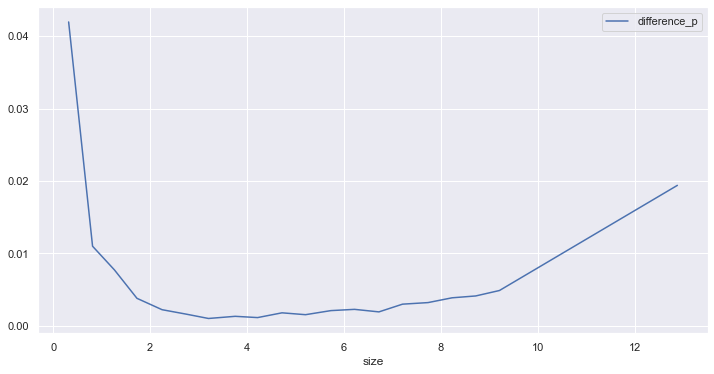

In [ ]:
pd.options.display.max_rows = 500


a = e.copy()

a.sort_values('size', inplace=True)
bins =  np.arange(0, 10, 0.5)
ind = np.digitize(a['size'], bins)
    
b = a.groupby(ind).mean()
print(e['difference_p'].mean())
#x = e.drop(columns=['actual', 'prediction'])
e.sort_values('size', inplace=True)
b.plot(x='size', y='difference_p',kind='line', figsize=(12,6))
e.describe()